## Image Classification – Deep Learning Project in Python with Keras

Image classification is a fascinating deep learning project.<br>
Specifically, image classification comes under the computer vision project category.<br>

In this project, we will build a convolution neural network in Keras with python on a<br>
CIFAR-10 dataset. First, we will explore our dataset, and then we will train our neural <br>
network using python and Keras.

### What is Image Classification

* The classification problem is to categorize all the pixels of a digital image into one of the defined classes.

* Image classification is the most critical use case in digital image analysis.

* Image classification is an application of both supervised classification and unsupervised classification.
  * In supervised classification, we select samples for each target class. We train our neural network on these target class samples and then classify new samples.
  * In unsupervised classification, we group the sample images into clusters of images having similar properties. Then, we classify each cluster into our intended classes.

### About Image Classification Dataset
CIFAR-10 is a very popular computer vision dataset. This dataset is well studied in many types of deep learning research for object recognition.

This dataset consists of 60,000 images divided into 10 target classes, with each category containing 6000 images of shape 32*32.
This dataset contains images of low resolution (32*32), which allows researchers to try new algorithms. The 10 different classes of this dataset are:

1.  Airplane
2.  Car
3.  Bird
4.  Cat
5.  Deer
7.  Dog
8.  Frog
9.  Horse
10. Ship
11. Truck

CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.

#### Project Prerequisites:
The prerequisite to develop and execute image classification project is Keras and Tensorflow installation.

#### Steps for image classification on CIFAR-10:
1. Load the dataset from keras datasets module.

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

2. Plot some images from the dataset to visualize the dataset.

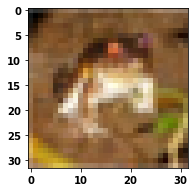

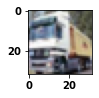

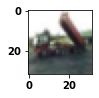

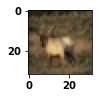

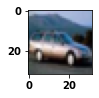

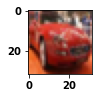

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

3. Import the required layers and modules to create our convolution neural net architecture.

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

4. Convert the pixel values of the dataset to float type and then normalize the dataset.

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

5. Now perform the one-hot encoding for target classes

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

6. Create the sequential model and add the layers.

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

7. Configure the optimizer and compile the model.

In [7]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

8. View the model summabry for better understanding of model architecture.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

9. Train the model.

In [9]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    #epochs=10,batch_size=32)
    epochs=25,batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 407s 260ms/step - loss: 1.7109 - accuracy: 0.3809 - val_loss: 1.4127 - val_accuracy: 0.4919
Epoch 2/25
1563/1563 [==============================] - 407s 260ms/step - loss: 1.3674 - accuracy: 0.5080 - val_loss: 1.2489 - val_accuracy: 0.5491
Epoch 3/25
1563/1563 [==============================] - 464s 297ms/step - loss: 1.1912 - accuracy: 0.5732 - val_loss: 1.0991 - val_accuracy: 0.6143
Epoch 4/25
1563/1563 [==============================] - 496s 317ms/step - loss: 1.0628 - accuracy: 0.6216 - val_loss: 1.0300 - val_accuracy: 0.6376
Epoch 5/25
1563/1563 [==============================] - 505s 323ms/step - loss: 0.9605 - accuracy: 0.6593 - val_loss: 0.9774 - val_accuracy: 0.6537
Epoch 6/25
1563/1563 [==============================] - 463s 296ms/step - loss: 0.8836 - accuracy: 0.6869 - val_loss: 0.9530 - val_accuracy: 0.6672
Epoch 7/25
1563/1563 [==============================] - 487s 311ms/step - loss: 0.8083 - accuracy: 0.7143 - val_

10. Calculate its accuracy on testing data.

In [10]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 22s 69ms/step - loss: 1.0098 - accuracy: 0.71190s - loss: 1.0059 - 
71.1899995803833


11. Save the model

In [11]:
#model.save("D:/Python/data-flair-python-course/Projects/Image Classification – Deep Learning Project in Python with Keras/model1_cifar_10epoch.h5")
model.save("../models/Image Classification/model1_cifar_10epoch.h5")

12. Make a dictionary to map to the output classes and make predictions from the model.

In [12]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
#im=Image.open("__image_path__")
#im=Image.open("D:\Python\data-flair-python-course\Projects\Image Classification – Deep Learning Project in Python with Keras\dog2.jpg")
im=Image.open("image/Image Classification/dog2.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
5 dog


* You can test the result on your custom image input. To improve accuracy, try increasing the epoch count to 25 for training.

### Image Classification Project GUI

* Here, we will build a graphical user interface for our image classifier. We will build this GUI using Tkinter python library.
* To install Tkinker: <b>sudo apt-get install python3-tk</b>

* To make the GUI, make a new file gui.py and copy our model (“model1_cifar_10epoch.h5”) to this directory.

* Now paste the below code into the gui.py file:
* Now run the python file gui.py to execute image classification project: python3 gui.py

In [13]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

from keras.models import load_model
model = load_model('../models/Image Classification/model1_cifar_10epoch.h5')

#dictionary to label all the CIFAR-10 dataset classes.

classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
    command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

aeroplane
bird
cat
aeroplane
dog
dog
